***
Final coursework for Data Science for Spatial Systems (CASA0006) of [Centre for Advanced Spatial Analysis (CASA)](https://www.ucl.ac.uk/bartlett/casa/), University College London

Code and file are hosted [Here](https://github.com/ucfnlih/Airbnb_Clustering_Wendi.git)

It takes about 10 minutes to run the entire notebook.
***

# Market Segmentation And Clustering Of Airbnb, London

| 1.Introduction | 2.Meth. & Data| 3.Exploratory Data Analysis (EDA) | 4.Data preparation| 5.Analysis and Result | 6.Dis. & Con. | Bibliography |

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2023-04-24 13:10:40


In [2]:
!pip install yellowbrick -q

In [3]:
!pip install pysal -q

In [4]:
# Basic Packages
import pysal as ps
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import libpysal
import warnings

# Visualisation Packages
from matplotlib import pyplot as plt # primary plotting package
import matplotlib.ticker as ticker # plt ticker manipulation
import seaborn as sns; sns.set(style="ticks", color_codes=True) 

# Clustering Packages
from spopt.region import MaxPHeuristic as MaxP
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.cluster import silhouette_score, calinski_harabasz_score, davies_bouldin_score

<a id="ID_a"></a>
## 1. Introduction
`Including literature review and research questions.`

**Airbnb** company encourages people to rent their vacant houses/rooms to travelers and provides the trading platform as an intermediary, which creating a new kind of rental between the long-term rental and hotel (Wachsmuth and Weisler, 2018). Although the business model of Airbnb is particularly controversial, its impact on tourism and life-style is significant. As the expansion of Airbnb, there are over 4 million hosts across 200-plus countries worldwide, leading to the emergence of diverse characteristics. Market segmentation needs to be applied to support the business.

**Market segmentation** is an important concept in commercial field, which means dividing the market to several heterogeneous segments that including homogeneous attributes respectively (Gichuru and Limiri, 2017). In response to the various demands of segments, different strategies are made by companies to improve customer retention, customer satisfaction and customer loyalty, which is advocated by Speed and Smith (1992). Wendell Smith (1956) suggested market segmentation might be the most effective way to manage the diversity within commercial layout.

Market segmentation can be subdivided into four types (Goyat, 2011), and the meaning can be summarized simply as the following interrogative sentences:

<p align="center">
  <img src="https://github.com/ucfnlih/Airbnb_Clustering_Wendi/raw/main/segmentation.png" width="250" height="250" >
  <br> Four Types Of Market Segmentation 
</p>

* Geographic Segmentation: *What is the geographical distribution?*
* Demographic Segmentation: *Who are the consumers?*
* Psychographic Segmentation: *What drives consumers to make decisions?*
* Behavioral Segmentation: *What are the categories of product attribute or consumer preference?*

**This paper aims to explore behavioral segmentation and geographic segmentation of Airbnb in London based on clustering on listings level and boroughs level.** In part I, basics segmentations of listings would be explored. The result of part I would show the potential segments of listings favored by different consumer groups, namely behavioral segmentation. In part II, variables are grouped by boroughs to explore the potential spatial segments, namely geographic segmentation. These lead to the following research questions:

- Part I: Behavioral Segmentation

  `Q1 | What potential segments of listings(customer preference) can be identified in London Airbnb market?`

- Part II: Geographic Segmentation

  `Q2 | What potential spatially segments of listings(customer preference) can be identified across London boroughs?`<br/>
  `Q3 | How does Airbnb perform in terms of geographic cohesion and regionalization in London?`

## 2. Methodology And Data

### 2.1 Methodology

To identify segments, clustering methods are commonly used. There are a variety of clustering methods, including K-means, hierarchical and DBSCAN for 'general-purpose' clustering and max-p algorithm for spatially constrained clustering. 

For 'general-purpose' clustering in this investigation, it is not expected to any data missing after clustering, so DBSCAN clustering methods is excluded. And a comparison process will be performed in K-means and hierarchical clustering methods, and the method with the higher silhouette score would be finally selected. 

For spatially constrained clustering, using max-p algorithm.

<center>
Methods Used For Analysis And Visualiztion

| Section | Description | Whether to include spatial data in clustering | Analysis Method | Visualization Method |
| :--: | :--: | :--: | :--: | :--: |
| Part I: Behavioral Segmentation | Clustering selected Airbnb dataset | No | K-means/Hierarchical| KDE plot & Boxplot |
| Part II: Geographic Segmentation - Non-spatial Constrained Clustering | Clustering borough dataset<br> (Grouping variables by boroughs) | No | K-means/Hierarchical | Boxplot & Map |
| Part II: Geographic Segmentation - Spatial Constrained Clustering| Clustering to borough dataset<br> (Adding geographic variables) | Yes | Max-p | Map |

</center>



### 2.2 Data Sources



- **InsideAirbnb dataset of London city**<br/>
Inside Airbnb is a mission driven project which collects airbnb data by cities and makes it available to the public for free. The dataset used here is airbnb data from March 2022 to March 2023 in London, which lastly scraped in 14 March, 2023.<br/>
The dataset is available in [Inside Airbnb website](http://insideairbnb.com/get-the-data).

- **Geopackage file of London borough**

In [5]:
# Remotely reading csv file in Inside Airbnb website
raw_airbnb = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2023-03-14/data/listings.csv.gz")
# If the original path is changed, please download the file here to read locally: https://onedrive.live.com/?id=879AA6DCD58612D3%21206&cid=879AA6DCD58612D3


# Remotely reading London borough geopackage file in github respository
London_Boroughs = gpd.read_file("https://github.com/ucfnlih/Airbnb_Clustering_Wendi/raw/main/Boroughs.gpkg")

## 3. Exploratory Data Analysis (EDA)

In [6]:
# Setting display options
pd.set_option('display.max_columns', None) # Displaying all columns

# Checking working directory 
print(f"The dataset contains {raw_airbnb.shape[0]} Airbnb listings.")
print(f"The dataset contains {raw_airbnb.shape[1]} variables.")
raw_airbnb.head(2)

The dataset contains 75241 Airbnb listings.
The dataset contains 75 variables.


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,714569379355913481,https://www.airbnb.com/rooms/714569379355913481,20230314070633,2023-03-14,city scrape,Lovely private bedroom in Muswell Hill.,Take a break and unwind at this peaceful oasis.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,39009854,https://www.airbnb.com/users/show/39009854,Forough,2015-07-20,"London, United Kingdom",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/403a9...,https://a0.muscache.com/im/pictures/user/403a9...,NaN,1.0,1.0,"['email', 'phone']",t,f,NaN,Haringey,NaN,51.597280,-0.139330,Private room in condo,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Iron"", ""Hangers"", ""Hair dryer"", ""Outdoor din...",$100.00,1,365,1.0,1.0,365.0,365.0,1.0,365.0,NaN,t,30,60,90,365,2023-03-14,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,808038970516277767,https://www.airbnb.com/rooms/808038970516277767,20230314070633,2023-03-14,city scrape,Studio Flat Franklin London,Brand New Modern Kitchen<br />Close to Excelle...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,495977998,https://www.airbnb.com/users/show/495977998,Hussein,2023-01-14,"London, United Kingdom",NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/a4bb5...,https://a0.muscache.com/im/pictures/user/a4bb5...,NaN,14.0,31.0,"['email', 'phone']",t,t,NaN,Barnet,NaN,51.636518,-0.177475,Entire rental unit,Entire home/apt,1,NaN,1 bath,1.0,1.0,[],$65.00,180,365,180.0,180.0,365.0,365.0,180.0,365.0,NaN,t,30,60,90,365,2023-03-14,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,7,7,0,0,NaN


### 3.1 Selecting Variables

75 original variables are included in the raw dataset, but most of them have small role on exploring market segmentation or represent repetitive meanings. Therefore, 14 variables that may be used are extracted from 75 original variables.

In [7]:
# Extract 16 variables and rename.
select_airbnb = raw_airbnb[['host_is_superhost','neighbourhood_cleansed','latitude','longitude','room_type','bedrooms','beds','price','minimum_nights','availability_60','number_of_reviews','review_scores_value','calculated_host_listings_count','host_response_rate']]
select_airbnb = select_airbnb.rename(columns={'id': 'listing_id', 'neighbourhood_cleansed': 'neighbourhood','calculated_host_listings_count':'listings_count','review_scores_value':'review_scores'})

<p align="center">
  <img src="https://github.com/ucfnlih/Airbnb_Clustering_Wendi/raw/main/variables_final.png" width="700" height="450" >
  <br> Selected Variables
</p>

### 3.2 Cleaning

Cleaning part includes dealing with null(NaN) and zero value, fixing original data types to expected types and changing irregularly formatted columns. Specifically, datasets needs to satisfy the following five conditions:
1. Data type needs to be consistent with the expected data type in figure 1.</br>
2. There are no null values and zero values in the dataset.</br>
3. The boolean categorical variables only contain 't' and 'f' and need to be converted to numerical fomat.</br>
4. The nominal categortical variables only contain correct categories.</br>
5. Numerical variables within reasonable limits.
 * `review_scores_value` within [0-5.0].
 * `minimum_nights` great than 365 days is considered the abnormal or invalid listing, need to be droped.
 * `bedrooms`, `beds` great than 20 may be the input error or invalid listing, need to be droped.
 * Listings with very high or very low `price` may be invalid or very special listings, need to be droped.</br>
6. The crs of geopackage file is epsg:27700

Therefore, the workflow for cleaning part consists of three parts: **Identifying Problems, Manipulating and Checking**.

#### Identifying Problems
A checking function is created to show data problems of datasets. 

In [8]:
# Creating problem identifying function
def check_function(check_df, check_geo):
  if check_geo.crs == 'epsg:27700':
    result_of_crs = f"Yes, the crs of geopackage file is epsg:27700."
  else:
    result_of_crs = f"No, the crs of geopackage file is not epsg:27700."

  result_df = pd.DataFrame(columns=['Variables Name', 'Data Type', 'Number of 0s', 'Number of Nulls'])
  warnings.filterwarnings('ignore')
  
  for col_name in check_df.columns:

    # 1. Getting data type
    data_type = str(check_df[col_name].dtype)

    # 2. Identifying null and zero values
    num_nulls = check_df[col_name].isna().sum()   
    num_zeros = (check_df[col_name] == 0).sum()

    # 3. Checking if the "host_is_superhost" and "instant_bookable" only contain "t" and "f"
    ## Checking variable "host_is_superhost"
    if set(check_df['host_is_superhost'].unique()) == {'t', 'f'}:
      result_of_host_is_superhost = "Yes, it only contains t and f."
    else:
      result_of_host_is_superhost = "No, it contains something other than t and f."

    # 4. Checking if the nominal categortical variables are correct.
    ## Checking if the neighbourhoods are from London's 33 boroughs
    borough_categories = London_Boroughs['NAME']
    neighbourhood_check = pd.Categorical(check_df["neighbourhood"], categories=borough_categories)
    if (neighbourhood_check.codes >= 0).all() and (neighbourhood_check.codes < len(borough_categories)).all():
      result_of_neighbourhood = "Yes, it only contains 33 boroughs."
    else:
      result_of_neighbourhood = "No, it contains something other than 33 boroughs."
    ## Checking if the room types only contains 
    room_type_categories = ['Entire home/apt','Private room','Shared room','Hotel room']
    room_type_check = pd.Categorical(check_df["room_type"], categories=room_type_categories)
    if (room_type_check.codes >= 0).all() and (room_type_check.codes < len(room_type_categories)).all():
      result_of_room_type = "Yes, it only contains 4 types of room."
    else:
      result_of_room_type = "No, it contains something other than 4 types of room."

    # 5. Checking if the numerical variables within reasonable limits
    ## Checking review_scores_value
    count_review_scores_value = 0
    for a in check_df['review_scores']:
      if a > 5 or a < 0:
        count_review_scores_value +=1
    if count_review_scores_value > 0:
      result_of_review_scores_value = f"No, {count_review_scores_value} of variable(s) is/are not within [0,5.0]."
    else:
      result_of_review_scores_value = "Yes, all variables are within [0,5]."

    ## Checking minimum_nights
    count_minimum_nights = 0
    for c in check_df['minimum_nights']:
      if c > 365:
        count_minimum_nights += 1
    if count_minimum_nights > 0:
      result_of_minimum_nights = f"No, {count_minimum_nights} variable(s) is/are greater than 365."
    else:
      result_of_minimum_nights = "Yes, all variables are 365 or less."

    ## Checking bedrooms and beds
    count_bedrooms_beds = 0
    for d in range(len(check_df['bedrooms'])):
      if check_df['bedrooms'][d] > 20 or check_df['beds'][d] > 20:
        count_bedrooms_beds += 1
    if count_bedrooms_beds > 0:
      result_of_bedrooms_beds = f"No, {count_bedrooms_beds} variable(s) is/are possibly incorrect or invalid."
    else:
      result_of_bedrooms_beds = f"Yes, all variables are invalid."

  # Adding the results to the new dataframe
    result_df = result_df.append({'Variables Name': col_name, 'Data Type': data_type, 'Number of 0s': num_zeros, 'Number of Nulls': num_nulls}, ignore_index=True)
  
  print(f"Is geopackage file correct? : {result_of_crs}")
  print(f"Is host_is_superhost correct? : {result_of_host_is_superhost}")
  print(f"Is neighbourhood correct? : {result_of_neighbourhood}")
  print(f"Is room_type correct? : {result_of_room_type}")
  print(f"Is review_scores_value correct? : {result_of_review_scores_value}")
  print(f"Is minimum_nights correct? : {result_of_minimum_nights}")
  print(f"Is bedrooms and beds correct? : {result_of_bedrooms_beds}")
    
  return result_df

Several problems are identified by `check_function`.

In [9]:
# Identifying the problem of original dataset using check_function
check_function(select_airbnb, London_Boroughs)

Is geopackage file correct? : Yes, the crs of geopackage file is epsg:27700.
Is host_is_superhost correct? : No, it contains something other than t and f.
Is neighbourhood correct? : Yes, it only contains 33 boroughs.
Is room_type correct? : Yes, it only contains 4 types of room.
Is review_scores_value correct? : Yes, all variables are within [0,5].
Is minimum_nights correct? : No, 30 variable(s) is/are greater than 365.
Is bedrooms and beds correct? : No, 7 variable(s) is/are possibly incorrect or invalid.


,Variables Name,Data Type,Number of 0s,Number of Nulls
0,host_is_superhost,object,0,18
1,neighbourhood,object,0,0
2,latitude,float64,0,0
3,longitude,float64,1,0
4,room_type,object,0,0
5,bedrooms,float64,0,3473
6,beds,float64,0,1106
7,price,object,0,0
8,minimum_nights,int64,0,0
9,availability_60,int64,34220,0


#### Manipulating
Now processing the data problems identified above.

In [10]:
select_airbnb_clean = select_airbnb.copy()

# Fixing the data type
## Coverting 'price' from oject to int64
money = ['price']
for m in money:
    print(f"Converting {m}")
    select_airbnb_clean[m] = select_airbnb_clean[m].str.replace('$','', regex=False).str.replace(',','', regex=False).astype('float')
## Coverting 'host_response_rate' from object to float
select_airbnb_clean['host_response_rate'] = select_airbnb_clean['host_response_rate'].str.replace('%', '').astype(float) / 100
## Coverting binary categorical variables to 2 numerical variables (t=1, f=0)
select_airbnb_clean = select_airbnb_clean[select_airbnb_clean['host_is_superhost'].isin(['t', 'f'])]
select_airbnb_clean['host_is_superhost_t'] = select_airbnb_clean['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
select_airbnb_clean['host_is_superhost_f'] = select_airbnb_clean['host_is_superhost'].apply(lambda x: 1 if x == 'f' else 0)
# Dropping unreasonable and invalid rows with numerical data.
select_airbnb_clean = select_airbnb_clean[select_airbnb_clean['minimum_nights'] <= 365]
select_airbnb_clean = select_airbnb_clean[select_airbnb_clean['bedrooms'] <= 20]
select_airbnb_clean = select_airbnb_clean[select_airbnb_clean['beds'] <= 20]

# Dropping null values and zero values again
# select_airbnb_clean = select_airbnb_clean[~(select_airbnb_clean == 0).any(axis=1)]
select_airbnb_clean.loc[:, ~(select_airbnb_clean.columns.isin(['host_is_superhost_t', 'host_is_superhost_f']))] = select_airbnb_clean.loc[:, ~(select_airbnb_clean.columns.isin(['host_is_superhost_t', 'host_is_superhost_f']))].replace(0, np.nan)

# Drop all rows that contain NaN values
#df = df.dropna()
select_airbnb_clean = select_airbnb_clean.dropna(axis=0)

# Dealing with the outliers of 'price' using Interquartile range (IQR)
## Calculate the IQR for the specific column
Q1 = select_airbnb_clean['price'].quantile(0.25)
Q3 = select_airbnb_clean['price'].quantile(0.75)
IQR = Q3 - Q1
## Filter out rows that contain outliers in the specific column
select_airbnb_clean = select_airbnb_clean[(select_airbnb_clean['price'] >= Q1 - 1.5*IQR) & (select_airbnb_clean['price'] <= Q3 + 1.5*IQR)]
select_airbnb_clean = select_airbnb_clean.reset_index(drop=True)

Converting price


#### Checking
Using the `check_function` in the first part again to check whether the problems have been solved.

In [11]:
# Checking the dataset after cleaning using check_function that define previously
check_function(select_airbnb_clean,London_Boroughs)

Is geopackage file correct? : Yes, the crs of geopackage file is epsg:27700.
Is host_is_superhost correct? : Yes, it only contains t and f.
Is neighbourhood correct? : Yes, it only contains 33 boroughs.
Is room_type correct? : Yes, it only contains 4 types of room.
Is review_scores_value correct? : Yes, all variables are within [0,5].
Is minimum_nights correct? : Yes, all variables are 365 or less.
Is bedrooms and beds correct? : Yes, all variables are invalid.


,Variables Name,Data Type,Number of 0s,Number of Nulls
0,host_is_superhost,object,0,0
1,neighbourhood,object,0,0
2,latitude,float64,0,0
3,longitude,float64,0,0
4,room_type,object,0,0
5,bedrooms,float64,0,0
6,beds,float64,0,0
7,price,float64,0,0
8,minimum_nights,int64,0,0
9,availability_60,float64,0,0


All the answers become "Yes", and none of variables include null value or zero value (Except for binary variables). 

**Cleaning has finished!**

### 3.3 Data Description and Visualization

In [12]:
select_airbnb_clean.describe()

,latitude,longitude,bedrooms,beds,price,minimum_nights,availability_60,number_of_reviews,review_scores,listings_count,host_response_rate,host_is_superhost_t,host_is_superhost_f
count,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000,25756.000000
mean,51.509009,-0.129298,1.449876,1.801794,136.474375,4.260638,26.575322,31.692421,4.582241,10.874709,0.965500,0.266850,0.733150
std,0.048638,0.105287,0.793447,1.198640,84.323686,11.496344,18.310814,56.361445,0.504818,28.356005,0.094606,0.442322,0.442322
min,51.296850,-0.497800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,0.000000,0.000000
25%,51.484070,-0.192223,1.000000,1.000000,68.000000,1.000000,11.000000,4.000000,4.460000,1.000000,0.990000,0.000000,0.000000
50%,51.513200,-0.128397,1.000000,1.000000,120.000000,2.000000,23.000000,12.000000,4.710000,2.000000,1.000000,0.000000,1.000000
75%,51.536960,-0.068358,2.000000,2.000000,185.000000,4.000000,42.000000,34.000000,4.890000,7.000000,1.000000,1.000000,1.000000
max,51.681142,0.278960,12.000000,15.000000,397.000000,365.000000,60.000000,1328.000000,5.000000,284.000000,1.000000,1.000000,1.000000


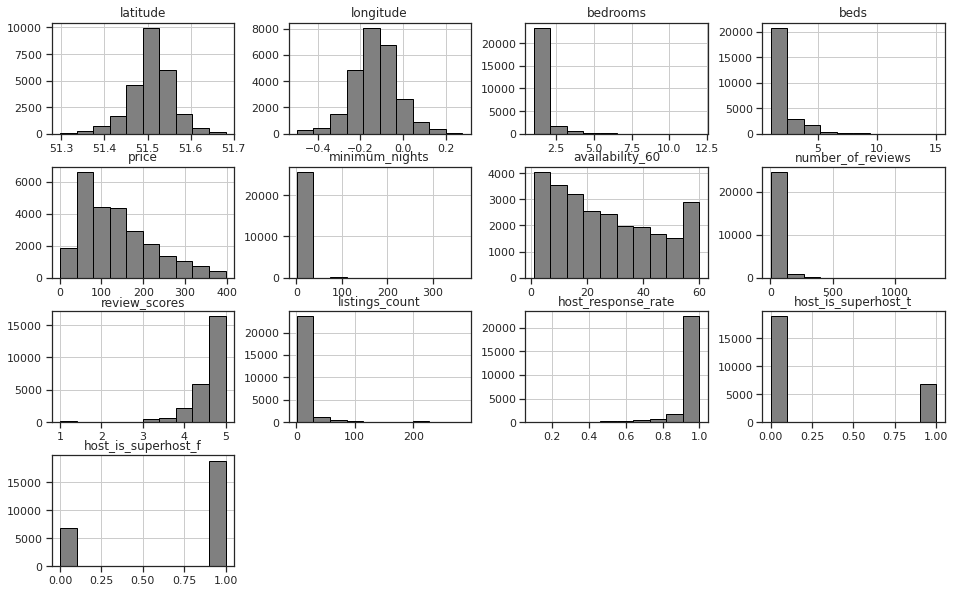

In [13]:
# Assigning the plot to the dummy variable _, so the additional information won't be displayed
_ = select_airbnb_clean.hist(figsize = (16,10),color = 'grey', edgecolor='black') 

## 4. Data preparation

For different analysis parts, the datasets used are a little different. Therefore, sub-datasets need to be prepared before analysis. Each sub-dataset is based on cleaned dataset `select_airbnb_clean`.

#### Listing Dataset

In [14]:
# Dataset for clustering result analysis of listings 
listing_level = select_airbnb_clean.copy()
listing_level = listing_level[['latitude','longitude','host_response_rate','price','availability_60','number_of_reviews','review_scores','listings_count','minimum_nights','host_is_superhost_t','host_is_superhost_f','bedrooms','beds']]
# Dataset for K-means & hierarchical clustering process
listing_clustering = listing_level[['host_response_rate','price','availability_60','number_of_reviews','review_scores','listings_count','minimum_nights','host_is_superhost_t','host_is_superhost_f','bedrooms','beds']]

#### Borough Dataset

In [15]:
# Variables that needed in borough level analysis
borough_level = select_airbnb_clean.copy()
borough_level = borough_level[['neighbourhood','room_type','price','minimum_nights','availability_60','number_of_reviews','listings_count','review_scores']]

# Grouping by 'neighbourhood'
data_mean = borough_level.groupby('neighbourhood').agg({'price': 'mean', 'minimum_nights': 'mean','availability_60':'mean','number_of_reviews':'mean','listings_count':'mean','review_scores':'mean'})
data_room_type = pd.pivot_table(borough_level, index='neighbourhood', columns='room_type', values='price', aggfunc='count').fillna(0)
data_count = borough_level.groupby('neighbourhood').agg({'price': 'count'})

data_count = data_count.reset_index()
data_count.columns = ['neighbourhood', 'listings_number_of_borough']

borough_grouped = data_mean.join(data_room_type, on='neighbourhood')
borough_grouped = borough_grouped.reset_index()
borough_grouped.columns = ['neighbourhood', 'price_mean', 'minimum_nights_mean', 'availability_60_mean', 'number_of_reviews_mean', 'listings_count_mean', 'review_scores_mean','Entire_home_apt_count','Hotel_room_count', 'Private_room_count', 'Shared_room_count']
borough_grouped = borough_grouped.rename(columns={'neighbourhood': 'NAME'})

borough_grouped = borough_grouped.merge(data_count, left_on='NAME', right_on='neighbourhood', how='left')
borough_grouped = borough_grouped.drop(columns=['neighbourhood'])

# Merging with london borough shapefile
borough_merged = pd.merge(London_Boroughs, borough_grouped, on='NAME', how='outer')

# Dataset for clustering result analysis of boroughs
# Dataset for max-p clustering
borough_merged = borough_merged.drop(['HECTARES','NONLD_AREA','ONS_INNER'], axis=1)

# Dataset for K-means & hierarchical clustering process
borough_clustering = borough_merged.drop(['NAME','GSS_CODE','geometry','listings_number_of_borough'], axis=1)

## 5. Analysis and Result

This section focuses on analysis, which is divided into behavioral segmentation and geographic segmentation. For behavioral segmentation part, only non-spatially constrained clustering is executed. For geographic segmentation, both non-spatially constrained and spatially constrained clustering are executed. 

The non-spatially constrained for both part will undergo a comparison-selection process to select the final method between K-means and hierarchical clustering methods. 

The results of clustering will be visualized by maps or graphs. Some functions will be created to simplify and clarify processes.

Before analysis, **creating some functions** related to standardization and non-spatially constrained clustering method selecting(K-means or hierarchical):

The `standardization_function()` function aims to standardize data before clustering.

In [16]:
# Standardization Function
def standardization_function(clustering_data):
  # standardization
  rs = RobustScaler(quantile_range=(10.0, 90.0))
  normed = clustering_data.copy()
  for c in clustering_data.columns.values:
      normed[c] = rs.fit_transform(clustering_data[c].values.reshape(-1,1))
      #print("The range of {} is [{}, {}]".format(c, clustering_data[c].min(), normed[c].max()))
  return normed

The `comparison_function()` function aims to choose the number of clusters for K-means and hierarchical. 

***Note:*** *Although hierarchical clustering can be performed without specifying the number of clusters, if you want to perform score evaluation, you must manually select the number of clusters by dendrogram.*

In [17]:
# Statements for this function:
# up_threshold_value and down_threshold_value are got after running this function. 
# For a better display of the results, here I have made a trial run and set values for them.
# If you are the first time to run, please set them to 0 temporarily.

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch

# Comparison function
# up_threshold_value = 
# down_threshold_value =

def comparison_function(normed_data, up_threshold_value, down_threshold_value):
    # Creating a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plotting Elbow chart on the first subplot
    model = KMeans(init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    visualizer = KElbowVisualizer(model, k=(1, 11), timings=False, ax=ax1)
    visualizer.fit(normed_data)
    visualizer.finalize()

    # Plotting dendrogram on the second subplot
    linkage_matrix = sch.linkage(normed_data, method='ward')
    dendrogram = sch.dendrogram(linkage_matrix, truncate_mode='level', p=3, ax=ax2)
    ax2.set_title('Dendrogram')
    ax2.set_xlabel('Samples')
    ax2.set_ylabel('Euclidean distances')
    ax2.tick_params(axis='x', labelsize=8)
    ax2.hlines(up_threshold_value, ax2.get_xlim()[0], ax2.get_xlim()[1], linestyle='dashed', color='r') # If you are the first time to run this function, please set this line as comment temporarily. 
    ax2.hlines(down_threshold_value, ax2.get_xlim()[0], ax2.get_xlim()[1], linestyle='dashed', color='r') # If you are the first time to run this function, please set this line as comment temporarily.

    # Showing both plots
    plt.show()

The `selection_function` function executes the K-means and hierarchical clstering process and outputs the corresponding silhouette score, then a comparison process will be executed and finally output clustering labels from the method with the higher silhouette score.

In [18]:
from sklearn.cluster import AgglomerativeClustering

def selection_function(normed_data,k_cluster,h_cluster):
  # Executing K-Means clustering
  k_cluster = k_cluster
  random_seed = 1
  kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
  kmeans_method.fit(normed_data)
  #k_labels = kmeans_method.labels_

  # Executing hierarchical clustering
  h_cluster = h_cluster
  cluster = AgglomerativeClustering(n_clusters=h_cluster, distance_threshold=None, linkage='ward')
  #h_labels = cluster.fit_predict(normed_data)

  # Silhouette score of K-means clustering 
  k_labels = kmeans_method.labels_
  silhouette_score_k = silhouette_score(normed_data,k_labels)
  silhouette_score_k

  # Silhouette score of hierarchical clustering
  h_labels = cluster.fit_predict(normed_data)
  silhouette_score_h = silhouette_score(normed_data, h_labels)
  silhouette_score_h

  print(f"The silhouette score of K-means method is {silhouette_score_k}.")
  print(f"The silhouette score of hierarchical method is {silhouette_score_h}.")
  if silhouette_score_k > silhouette_score_h:
    print(f"Select K-means method for clustering!")
    return k_labels
  else:
    print(f"Select hierarchical method for clustering!")
    return h_labels

### 5.1 Part I: Behavioral Segmentation - `Listings Clustering Exploration`

**Analysis**

Standardizing the listing clustering data by `standardization_function()`.

In [19]:
listing_clustering_normed = standardization_function(listing_clustering)

Choosing the appropriate number of clusters for K-means and hierarchical clustering method by `comparison_function()`.

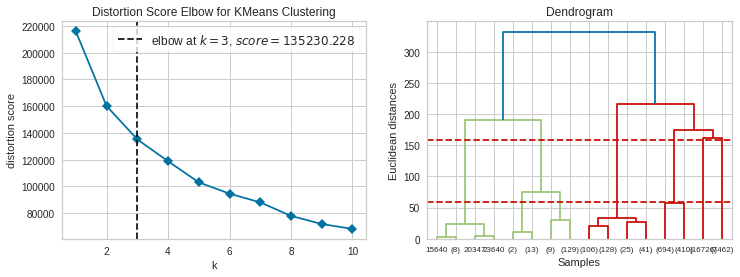

In [20]:
up_threshold_value_listings = 159
down_threshold_value_listings = 59.8
comparison_function(listing_clustering_normed,up_threshold_value_listings,down_threshold_value_listings)

The Elbow plot shows that `3` is the appropriate number of clusters for K-means method.

The dendrogram shows that there is the biggest gap is between the distance of around 59.8 and the distance of around 159, which indicates that the next merge possibly shouldn't happen. Therefore, subjectively considering that `5` is the most appropriate number of clusters for hierarchical method.

In [21]:
k_cluster_listing = 3
h_cluster_listing = 5
selection_function(listing_clustering_normed,k_cluster_listing,h_cluster_listing)

The silhouette score of K-means method is 0.6309227880640231.
The silhouette score of hierarchical method is 0.462828031177783.
Select K-means method for clustering!


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

**Visualization**

Results of `selection_function()` shows that the silhouette score of K-means is higher than hierarchical. Therefore, **K-means clustering method is selected** here and the results will be visualized.

In the visualization part, 6 representative variables are selected for visualization.

***Statements for visualiztion：***

- *Due to the skewed data distribution and magnitude differences, `minimum_nights`, `listings_count`, `number_of_reviews` are log-transformed as `log_minimum_nights`, `log_listings_count`, `log_number_of_reviews` for visualization.*

- *To more clearly represent the differences between the three clusters, two types of plots are used here for 6 variables.*

The silhouette score of K-means method is 0.6309227880640231.
The silhouette score of hierarchical method is 0.462828031177783.
Select K-means method for clustering!


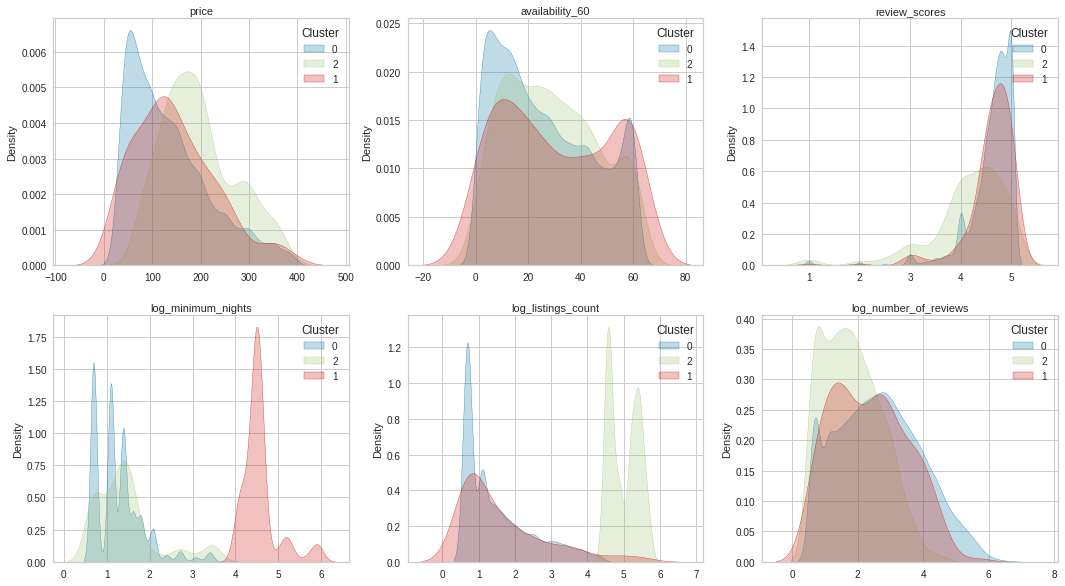

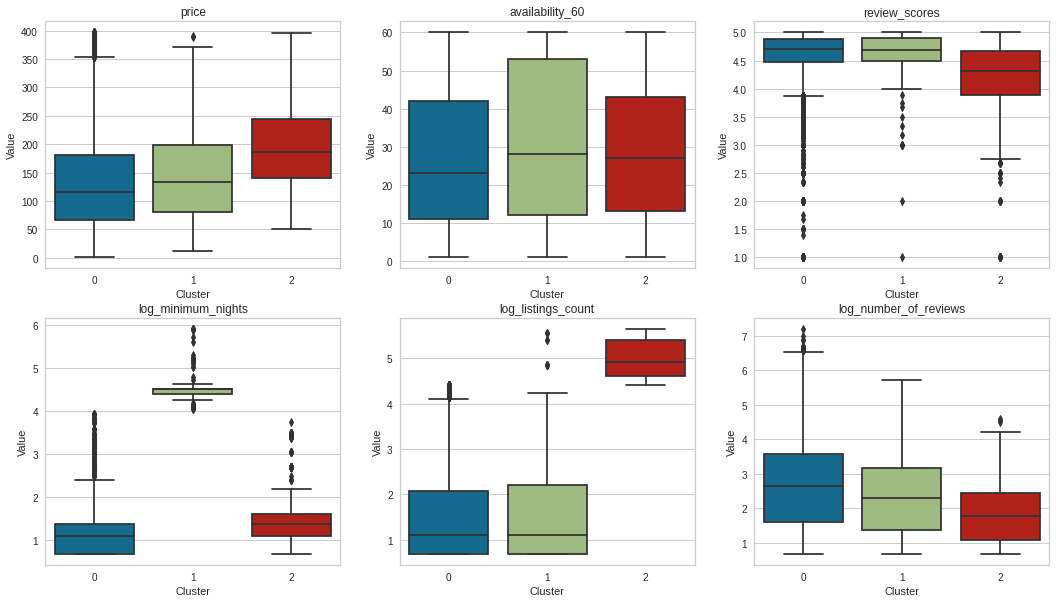

In [22]:
# Extracting clustering labels from selection_function
listing_clustering['cluster_nm'] = selection_function(listing_clustering_normed,k_cluster_listing,h_cluster_listing)
listing_clustering_plot = listing_clustering.copy()

# Logging some variables that do not show up clearly
listing_clustering_plot['log_minimum_nights'] = np.log1p(listing_clustering_plot['minimum_nights'])
listing_clustering_plot['log_listings_count'] = np.log1p(listing_clustering_plot['listings_count'])
listing_clustering_plot['log_number_of_reviews'] = np.log1p(listing_clustering_plot['number_of_reviews'])

data_columns = listing_clustering_plot.columns.tolist()
columns_to_remove = ['bedrooms','beds','cluster_nm','number_of_reviews','minimum_nights','listings_count','host_is_superhost_t','host_is_superhost_f','host_response_rate']
for col in columns_to_remove:
    data_columns.remove(col)

# Setting numbers of column and row
num_cols = 3
num_rows = len(data_columns) // num_cols + (1 if len(data_columns) % num_cols > 0 else 0)

# Creating the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()

# Looping through each variable and plot the distributions for each cluster
for i, col in enumerate(data_columns):
    for cluster in listing_clustering_plot['cluster_nm'].unique():
        subset = listing_clustering_plot[listing_clustering_plot['cluster_nm']==cluster][col]
        sns.distplot(subset, hist=False, kde=True, kde_kws={'shade': True}, label=cluster, ax=axes[i])
    axes[i].xaxis.set_label_position('top') 
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].legend(title='Cluster')

# Displaying the plot
plt.show()

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(data_columns):
    sns.boxplot(data=listing_clustering_plot, x='cluster_nm', y=col, ax=axes[i])
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Value')
    axes[i].set_title(col)

# Plotting
plt.show()

Three clusters of listings have the clear heterogeneous characteristics. 

In general, they can be summarized into three behavioral segments:

- **Cluster 0: "Personal rental segment"**<br/>
Personal rental segment refers to the short-term rental of an individual's vacant room or home, which caters to travelers. The primary focus of this segment is sharing rather than profit-making. This segment is characterised by low price, high popularity and lowe minimum booking nights. However, a potential drawback of this segment is the inconsistent quality due to self-cleaning practices.<br/>
 ***Applicable customer base:*** *Low budget, short-term rental, enjoy making friends, low requirements for private space and living conditions.*

- **Cluster 1: "Long-term rental segment"**<br/>
Long-term rental segment refers to the listings with the high minimum booking nights, which many experts believe disrupt the rental market. The most obvious characteristic is the high minimum booking nights and high price. But the quality is typically high, so it has the highest review score.<br/>
 ***Applicable customer base:*** *High budget, long-term rental, high requirements for private space, living conditions and service*


- **Cluster 2: "Commercial rental segment"**<br/>
Commercial rental segment refers to the listings that hosted by someone who considering Airbnb as a business model. The most important characteristic for this segment is the large number of listings hold by hosts. As hosts focus on multi-listing profitability, the quality of listings can be uneven due to negligence. However, listings of this segment are usually entire home, so this segment is always the first choice of tourists.<br/>
 ***Applicable customer base:*** *High budget, short-term rental, high requirements for private space, living conditions and service (But there is a risk of unmet expectations)*

### 5.2 Part II: Geographic Segmentation - `Boroughs Clustering Exploration`

#### Approach 1: Non-spatial Constrained Clustering

**Analysis**

Standardizing the borough clustering data by `standardization_function()`.

In [23]:
borough_clustering_normed = standardization_function(borough_clustering)

The `comparison_function()` function aims to choose the number of clusters for K-means and hierarchical.

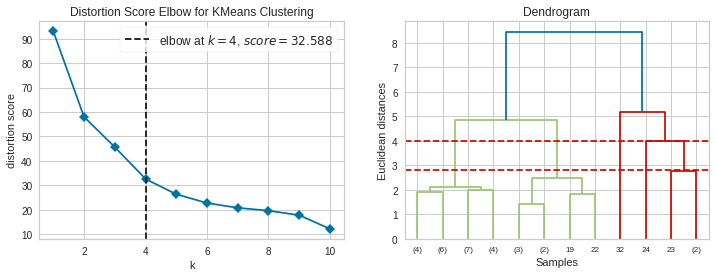

In [24]:
up_threshold_value_listings = 3.98
down_threshold_value_listings = 2.8
comparison_function(borough_clustering_normed,up_threshold_value_listings,down_threshold_value_listings)

According to the same method as section 5.1, selecting 4 and 5 as the number of clusters for K-means and hierarchical methods respectively, then comparing.

In [25]:
k_cluster_borough = 4
h_cluster_borough = 5
selection_function(borough_clustering_normed,k_cluster_borough,h_cluster_borough)

The silhouette score of K-means method is 0.3450150998995334.
The silhouette score of hierarchical method is 0.3212703830589448.
Select K-means method for clustering!


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 3], dtype=int32)

Results of `selection_function()` shows that the silhouette score of K-means is higher than hierarchical. Therefore, **K-means clustering method is selected again!**

Now, checking which boroughs are included in each clusters.

In [26]:
from IPython.display import display, HTML
# Extracting clustering labels from selection_function
borough_merged['cluster_nm'] = selection_function(borough_clustering_normed, k_cluster_borough, h_cluster_borough)

# Plotting the boroughs in each clusters by dataframe
clustered_df = borough_merged.groupby('cluster_nm')['NAME'].apply(list).reset_index()
def render_dataframe_with_custom_options(df):
    with pd.option_context('display.max_colwidth', None):
        styled_df = df.style.set_table_styles([
            {'selector': 'th', 'props': [('text-align', 'center')]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ])
        return HTML(styled_df.render())

display(render_dataframe_with_custom_options(clustered_df))

The silhouette score of K-means method is 0.3450150998995334.
The silhouette score of hierarchical method is 0.3212703830589448.
Select K-means method for clustering!


,cluster_nm,NAME
0,0,"['Kingston upon Thames', 'Croydon', 'Bromley', 'Hounslow', 'Ealing', 'Havering', 'Hillingdon', 'Harrow', 'Brent', 'Barnet', 'Lewisham', 'Greenwich', 'Bexley', 'Enfield', 'Waltham Forest', 'Redbridge', 'Sutton', 'Merton', 'Haringey', 'Newham', 'Barking and Dagenham']"
1,1,"['Kensington and Chelsea', 'Westminster']"
2,2,"['Lambeth', 'Southwark', 'Richmond upon Thames', 'Wandsworth', 'Hammersmith and Fulham', 'Camden', 'Tower Hamlets', 'Islington', 'Hackney']"
3,3,['City of London']


**Visualization**

Then selecting representative viriables for boroughs to visualize. Due to the amount of data at the borough level is only 33 and there is only one row for cluster 3, so the visualization here uses only box plots. 

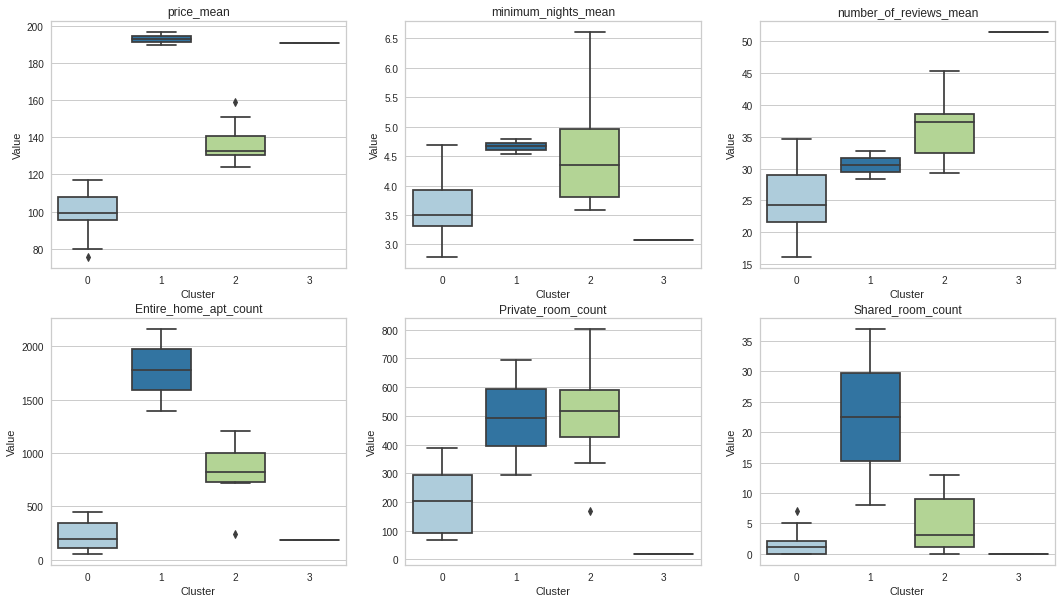

In [27]:
borough_merged_plot = borough_merged.copy()

# Create a list of the variables
data_columns = borough_merged_plot.columns.tolist()
# columns_to_remove = ['cluster_nm','geometry','GSS_CODE','NAME','availability_60_mean','Hotel_room_count','listings_count_mean','number_of_reviews_mean']
columns_to_remove = ['cluster_nm','geometry','GSS_CODE','NAME','availability_60_mean','Hotel_room_count','listings_count_mean','review_scores_mean','listings_number_of_borough']
for col in columns_to_remove:
    data_columns.remove(col)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 5 * 2))
axes = axes.flatten()

palette = sns.color_palette("Paired")
for i, col in enumerate(data_columns):
    sns.boxplot(data=borough_merged_plot, x='cluster_nm', y=col, ax=axes[i],palette=palette)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Value')
    axes[i].set_title(col)

plt.show()

Then plotting the clusters result to map.

In [28]:
!pip install adjustText -q

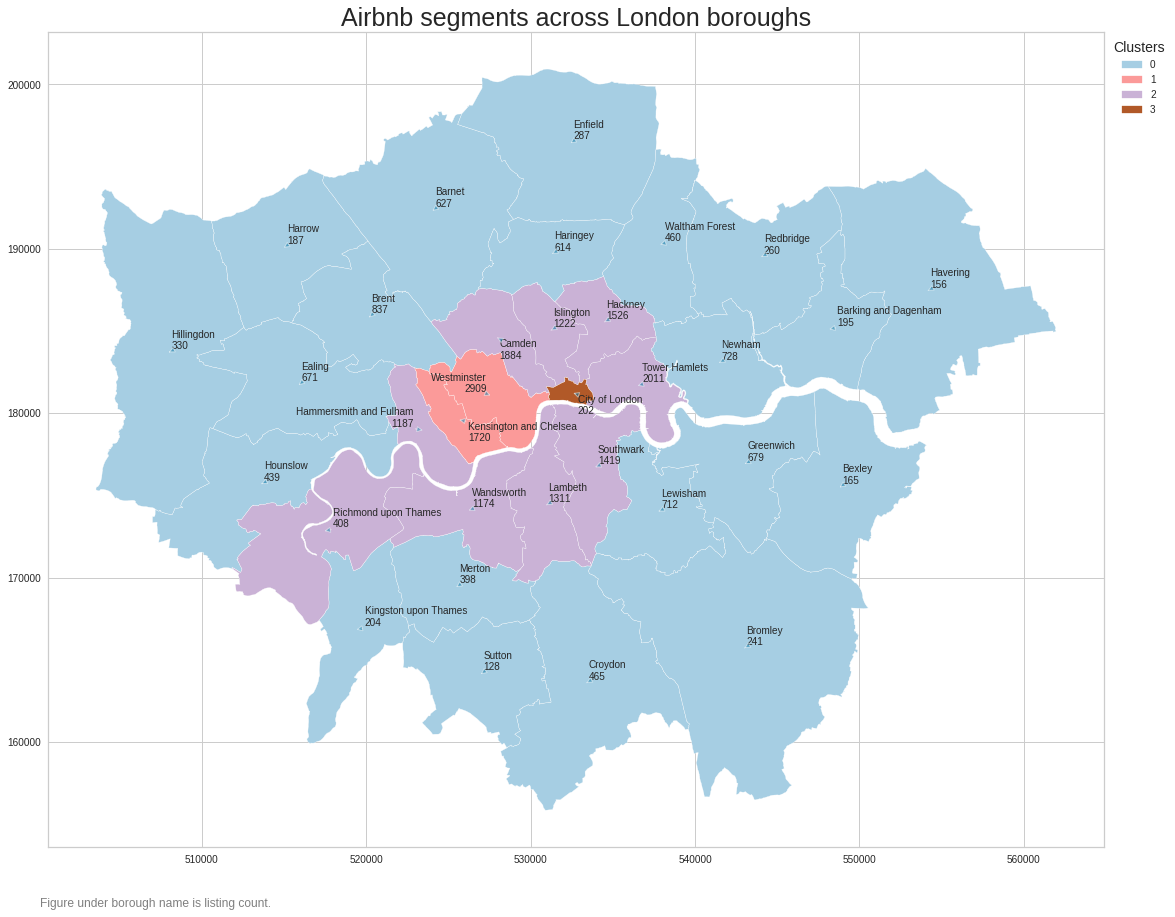

In [29]:
from adjustText import adjust_text
import matplotlib.patches as mpatches

# Extracting longitude and latitude from geometry
borough_merged['longitude'] = borough_merged['geometry'].centroid.x
borough_merged['latitude'] = borough_merged['geometry'].centroid.y

# Getting the unique cluster labels and a suitable colormap
unique_clusters = sorted(borough_merged['cluster_nm'].unique())
cmap = plt.get_cmap('Paired', len(unique_clusters))

# Setting legend
legend_handles = [mpatches.Patch(facecolor=cmap(i), edgecolor=cmap(i), label=cluster) for i, cluster in enumerate(unique_clusters)]

# Setting figure size
fig, ax = plt.subplots(figsize=(25, 15))
borough_merged.plot(column='cluster_nm',cmap='Paired',ax=ax)
ax.legend(handles=legend_handles, title='Clusters', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title_fontsize=14)

# Adding names and listing number of each borough
# Preventing text overlap
texts = []
for i in range(len(borough_merged)):
    texts.append(plt.text(borough_merged.longitude[i], borough_merged.latitude[i],
                          "{}\n{}".format(borough_merged.NAME[i], borough_merged.listings_number_of_borough[i]),
                          size=10))

adjust_text(texts, ax=ax, expand_points=(1.2, 1.2), expand_text=(1.2, 1.2), force_points=0.75, force_text=0.75,
            arrowprops=dict(arrowstyle="-|>", lw=1, alpha=0.5))

# Add a statmeny
plt.figtext(0.215, 0.07, "Figure under borough name is listing count.", color='grey', fontsize=12)

# Plotting
plt.title('Airbnb segments across London boroughs',fontsize=25)
plt.show()

According to the box plots and map, it can be summarized to four geographic segments:

- **Cluster 0: "Suburban low-price segment"**<br/>
This segment is away from the city center but with the lower price. Private room is the main type of listings. <br/>
 ***Applicable customer base:*** *Low budget, self-driving, low requirements for location*

- **Cluster 1: "City center high-price segment"**<br/>
This segment is in the center of London, which are both highly rated neighborhood. This segment has the largest number of listings and is a top choice for travelers.<br/>
 ***Applicable customer base:*** *High budget, non-self-driving, high requirements for location*

- **Cluster 2: "Sub-center medium-price segment"**<br/>
This segment is in the sub-center of London, with the medium price between segment 0 and segment 2. This segment is the most popular one among these three segments (`number_of_reviews_mean`).<br/>
 ***Applicable customer base:*** *Medium budget, non-self-driving, medium requirements for location*

- **Cluster 3: "Business and financial segment"**<br/>
This segment is unique in that it contains only "City of London" borough, which is a economy center in London. This borough is mainly comprised of office buildings with very few listings, so it is not meaningful for Airbnb research.<br/>
 ***Applicable customer base:*** *Business people who come to city of London*

#### Approach 2: Spatial Constrained Clustering

**Analysis & Visualization**

6.6000000000000005


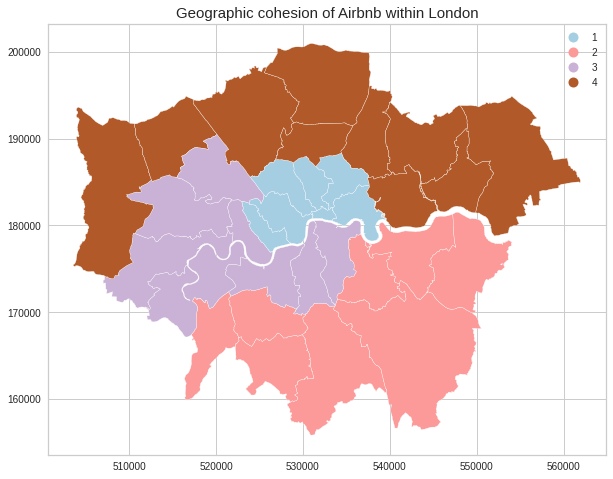

CPU times: user 1min 13s, sys: 0 ns, total: 1min 13s
Wall time: 1min 12s


In [30]:
%%time

# Preparation
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = [12, 8]
RANDOM_SEED = 123456

# Defining the variables that will be used to measure regional homogeneity
attrs_name = borough_clustering_normed.columns.values.tolist()

# Creating spatial weights object
w = libpysal.weights.Queen.from_dataframe(borough_merged)

# Specifying the minimum number of MSOAs contained by each region (threshold)
threshold = 0.2 * borough_clustering_normed.shape[0]
print(threshold)
borough_clustering_normed_copy = borough_clustering_normed.copy()
borough_clustering_normed_copy["count"] = 1
threshold_name = "count"

# Executing
np.random.seed(RANDOM_SEED)
model = MaxP(borough_clustering_normed_copy, w, attrs_name, threshold_name, threshold, top_n=3)
model.solve()

# Plotting the map
borough_merged['cluster_max_p'] = model.labels_
borough_merged.plot(column='cluster_max_p', categorical=True, legend=True, figsize=(10,10), cmap='Paired');

plt.title('Geographic cohesion of Airbnb within London',fontsize=15)
plt.show()

The map shows that London is clearly divided into four categories under spatial constraints, indicating strong geographic cohesion.

## 6. Discussion And Conclusion

In conclusion, this investigation executes different clustering analysis to Airbnb in London in order to explore the behavioral segmentation and geographic segmentation. Several conclusions are summarized based on the research questions raised before the analysis:

- Part I: Behavioral Segmentation

  `Answer 1 | Three segments of "Personal rental segment", "Long-term rental segment" and "Commercial rental segment" are identified by tenancy term and business model in London Airbnb market.`

- Part II: Geographic Segmentation

  `Answer 2 | Four segments of listings are identified in borough level and there is a clear trend of geographical progression.`<br/> 

  `Answer 3 | Airbnbn listings have strong geographic cohesion within London.

And there are some findings beyond the research questions:

- `Addition 1 | Clustering of Airbnb at the borough level under non-spatial constraints also has strong spatial continuity and cohesion.`

- `Addition 2 | The performance of spatial cohesion under spatial constraints and non-spatial constraints have some differences.`

In [31]:
print("Running has finished！")

Running has finished！


# Bibliography

Goyat, S., 2011. The basis of market segmentation: a critical review of literature. European Journal of Business and Management.

Gichuru, M.J., Limiri, E.K., 2017. MARKET SEGMENTATION AS A STRATEGY FOR CUSTOMER SATISFACTION AND RETENTION. International Journal of Economics, Commerce and Management.

Speed, R., Smith, G., 1992. Retail Financial Services Segmentation. The Service Industries Journal 12, 368–383. https://doi.org/10.1080/02642069200000045

Smith, W.R., 1956. Product Differentiation and Market Segmentation as Alternative Marketing Strategies. Journal of Marketing 21, 3–8. https://doi.org/10.2307/1247695

Wachsmuth, D., Weisler, A., 2018. Airbnb and the rent gap: Gentrification through the sharing economy. Environ Plan A 50, 1147–1170. https://doi.org/10.1177/0308518X18778038

